In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


<AxesSubplot:xlabel='v1', ylabel='count'>

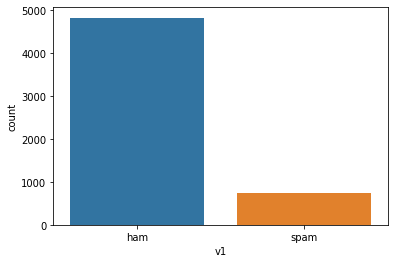

In [4]:
sns.countplot(x = 'v1', data=df)

In [5]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis =1, inplace = True)

In [7]:
spam= pd.get_dummies(df['v1'],drop_first=True)
spam.dtypes

spam    uint8
dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
message = vectorizer.fit_transform(df['v2'])
message

<5572x8625 sparse matrix of type '<class 'numpy.int64'>'
	with 73734 stored elements in Compressed Sparse Row format>

In [9]:
df = pd.concat([df,spam], axis=1)
df.drop(['v1','v2'],axis =1, inplace = True)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = message
y = df['spam']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()

In [15]:
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
predictions = model.predict(X_test)

In [17]:
model.score(X_test,y_test)

0.989237668161435

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       0.98      0.94      0.96       139

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [20]:
cm=confusion_matrix(y_test, predictions)
cm

array([[973,   3],
       [  9, 130]], dtype=int64)

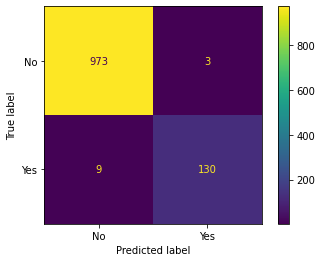

In [21]:
matrix = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["No", "Yes"])
matrix.plot()
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
sc = accuracy_score(y_test,predictions)
print("Accuracy Percentage: ",sc*100,"%")

Accuracy Percentage:  98.9237668161435 %
